In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as colors

from sklearn.utils import resample

from sklearn.preprocessing import scale

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

from sklearn.svm import SVC
from sklearn.decomposition import PCA

In [2]:
df = pd.read_excel("default of credit card clients.xls", header=1, index_col=0)

In [3]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

### Rename the target column

In [5]:
df.rename({'default payment next month':'default'.upper()}, axis=1, inplace=True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Missing data

In [6]:
df.isna().any().any()

False

In [7]:
df.SEX.unique()

array([2, 1])

In [8]:
df.EDUCATION.unique()

array([2, 1, 3, 5, 4, 6, 0])

In [9]:
df.MARRIAGE.unique()

array([1, 2, 3, 0])

#### removing missing data

In [10]:
df_missing_bool = (df['MARRIAGE'] == 0) | (df['EDUCATION'] == 0)

df_no_missing = df[~df_missing_bool]

In [11]:
df_no_missing.shape

(29932, 24)

In [12]:
df_no_missing.EDUCATION.unique()

array([2, 1, 3, 5, 4, 6])

In [13]:
df_no_missing.MARRIAGE.unique()

array([1, 2, 3])

### Downsample dataset

In [14]:
df_no_default = df_no_missing[df_no_missing['DEFAULT']==0]
df_default = df_no_missing[df_no_missing['DEFAULT']==1]

In [15]:
sample_no_default = resample(df_no_default,
                            replace=False,
                            n_samples=1000,
                            random_state=42)

In [16]:
sample_default = resample(df_default,
                          replace=False,
                          n_samples=1000,
                          random_state=42)

In [17]:
sample_no_default.shape, sample_no_default.shape

((1000, 24), (1000, 24))

In [18]:
sample_df = pd.concat([sample_no_default, sample_default])

### Define X and y

In [19]:
X = sample_df.drop('DEFAULT',axis=1).copy()
y = sample_df['DEFAULT'].copy()

In [20]:
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,
642,130000,2,3,1,28,0,0,0,0,-2,...,50000,0,0,0,2500,1000,0,0,0,0
4679,170000,1,3,1,29,0,0,0,0,0,...,172307,35234,32869,33862,7200,7500,1200,1200,1500,1300
16005,180000,2,2,1,29,0,0,0,0,0,...,26310,26662,26166,26176,1800,1800,1500,1056,950,1000
22975,210000,2,2,2,32,-2,-2,-2,-2,-2,...,410,0,0,0,979,412,0,0,0,0
17536,190000,2,3,1,45,0,0,0,0,0,...,80548,81778,83082,84811,3300,3331,3359,2663,2751,3000


In [21]:
y.head()

ID
642      0
4679     0
16005    0
22975    0
17536    0
Name: DEFAULT, dtype: int64

### Format data

In [22]:
X_encoded = pd.get_dummies(X, columns=['SEX',
                                      'EDUCATION',
                                      'MARRIAGE',
                                      'PAY_0',
                                      'PAY_2',
                                      'PAY_3',
                                      'PAY_4',
                                      'PAY_5',
                                      'PAY_6'])

X_encoded.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
ID,,,,,,,,,,,,,,,,,,,,,
642,130000,28,100143,50456,50000,0,0,0,2500,1000,...,0,1,0,0,0,0,0,0,0,0
4679,170000,29,165027,168990,172307,35234,32869,33862,7200,7500,...,0,0,0,1,0,0,0,0,0,0
16005,180000,29,25781,26000,26310,26662,26166,26176,1800,1800,...,0,0,0,1,0,0,0,0,0,0
22975,210000,32,355,975,410,0,0,0,979,412,...,0,1,0,0,0,0,0,0,0,0
17536,190000,45,76433,78472,80548,81778,83082,84811,3300,3331,...,0,0,0,1,0,0,0,0,0,0


### Split the dataset into train and test

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)


### Scale the data

In [24]:
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

### Build SVM model

In [25]:
clf = SVC(random_state=42)

In [26]:
clf.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [27]:
predictions = clf.predict(X_test_scaled)

In [28]:
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)

In [29]:
cm

array([[201,  56],
       [ 95, 148]])

In [30]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Did not defaulted', 'Defaulted'])

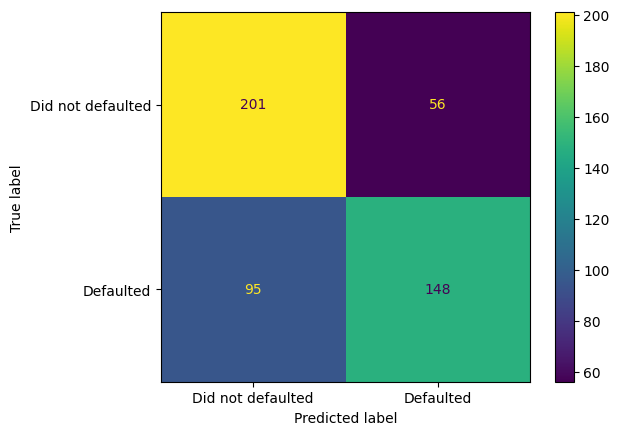

In [31]:
disp.plot()

In [32]:
accuracy_score(predictions,y_test)*100

69.8

### Improving model

In [33]:
param_grid = [
    {
        'C':[0.5, 1, 10, 100],
        'gamma':['scale', 1, 0.1, 0.01, 0.001, 0.0001],
        'kernel':['rbf']
    },
]


optimal_prams = GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=0
)

optimal_prams.fit(X_train_scaled,y_train)
optimal_prams.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [34]:
clf_svm = SVC(
    random_state=43,
    C=100,
    gamma=0.001
)

In [35]:
clf_svm.fit(X_train_scaled, y_train)

SVC(C=100, gamma=0.001, random_state=43)

In [37]:
pred = clf_svm.predict(X_test_scaled)

In [44]:
cm2 = confusion_matrix(y_test, pred, labels=clf_svm.classes_)

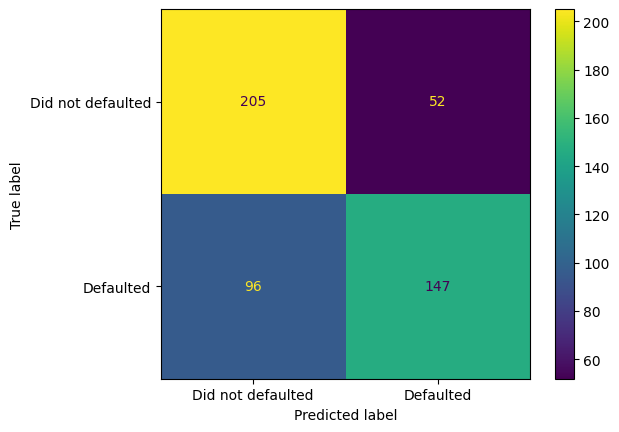

In [45]:
display = ConfusionMatrixDisplay(
    confusion_matrix=cm2,
    display_labels=['Did not defaulted', 'Defaulted']
)
display.plot()   

In [43]:
accuracy_score(pred,y_test)*100

70.39999999999999